# Car price prediction using Python

In [1]:
import os
from sklearn import linear_model, metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

### Define a helper function that we'll use later to predict and evaluate the results

In [2]:
def predict_and_plot(model, test_set, plot_title):

    # Let's turn the data into something more readable    
    test_set_elements_count = test_set.shape[0]
    test_features = np.float64(test_set[0:test_set_elements_count, 0:3])
    real_prices = np.float64(test_set[0:test_set_elements_count, 3])
    car_names = test_set[0:test_set_elements_count, 4]
    
    # Do the prediction
    predicted_prices = model.predict(test_features)

    # Compare the predicted price vs the real price rendering a graph
    x_ind = np.arange(test_set_elements_count)
    fig = plt.figure()
    plt.scatter(x_ind, predicted_prices,   label="predicted price")
    plt.scatter(x_ind, real_prices,  label="real price")
    plt.xticks(x_ind, car_names, rotation='vertical')
    plt.legend(loc='best')
    fig.suptitle(plot_title, fontsize=20)
    plt.show()
    
    # Get the regression score
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
    print ("R^2 Regression score:", metrics.r2_score(real_prices, predicted_prices))

## Step 1: Collect Training Data

In [3]:
# https://www.cars.com/research/compare/
df = pd.read_csv('.\\car_prices.csv')
# Let's look at the data
#df.shape
#df.columns
df

,MPG,HP,Rating,Price,Name
0,30,138,4.7,15220,Sonic
1,32,120,4.7,15455,Fiesta
2,30,109,4.2,12855,Versa
3,31,138,4.8,15015,Rio
4,31,158,4.7,19515,Civic
5,31,145,4.4,18085,Elantra
6,31,132,4.5,18185,Corolla
7,29,138,4.8,16995,Cruze
8,25,175,4.9,23485,Fussion
9,27,185,4.8,23080,Accord


### Let's get the features and prices from the dataframe so we can train the model

In [5]:
features = df.as_matrix(columns= df.columns[0:3])
prices = df.as_matrix(columns= df.columns[3:4])
features
#prices

array([[  30. ,  138. ,    4.7],
       [  32. ,  120. ,    4.7],
       [  30. ,  109. ,    4.2],
       [  31. ,  138. ,    4.8],
       [  31. ,  158. ,    4.7],
       [  31. ,  145. ,    4.4],
       [  31. ,  132. ,    4.5],
       [  29. ,  138. ,    4.8],
       [  25. ,  175. ,    4.9],
       [  27. ,  185. ,    4.8],
       [  31. ,  182. ,    4.8],
       [  28. ,  178. ,    4.6],
       [  31. ,  184. ,    4.7],
       [  23. ,  292. ,    4.8],
       [  24. ,  268. ,    4.9],
       [  23. ,  292. ,    4.7],
       [  22. ,  293. ,    4.6]])

## Step 2: Train Model

In [7]:
logistic_regression_model = linear_model.LogisticRegression()
logistic_regression_model.fit(features, prices.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Step 3: Evaluate Model

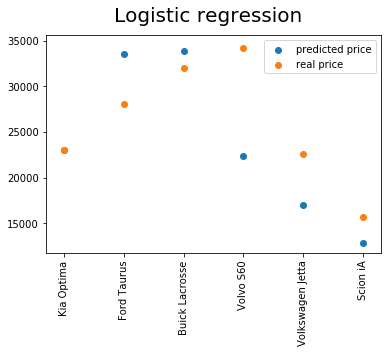

R^2 Regression score: 0.0897519763234


In [8]:
# https://www.cars.com/research/compare/?acodes=USC60KIC052A0,USC60FOC071A0,USC60BUC081A0
#                     MPG, HP,   Rating,  Price,  Name
test_set = np.array([[28,  185,  4.9,     22990,  "Kia Optima"],
                     [21,  240,  4.8,     28095,  "Ford Taurus"],
                     [23,  304,  4.3,     31990,  "Buick Lacrosse"],
                     [30,  240,  5.0,     34150,  "Volvo S60"],
                     [28,  150,  4.9,     22610,  "Volkswagen Jetta"],
                     [35,  106,  4.0,     15700,  "Scion iA"],])

predict_and_plot(logistic_regression_model, test_set, "Logistic regression")


## Repeat 2 and 3: Train a model and re-evaluate 

In [9]:
passive_aggressive_model = linear_model.PassiveAggressiveRegressor() # Must be a Seattle thing.
passive_aggressive_model.fit(features, prices.ravel())

PassiveAggressiveRegressor(C=1.0, epsilon=0.1, fit_intercept=True,
              loss='epsilon_insensitive', n_iter=5, random_state=None,
              shuffle=True, verbose=0, warm_start=False)

In [10]:
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(features, prices.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Let's compare the three models side by side

In [ ]:
predict_and_plot(logistic_regression_model, test_set, "Logistic regression")
predict_and_plot(linear_regression_model, test_set, "Linear regression")
predict_and_plot(passive_aggressive_model, test_set, "Passive aggressive regression (best name ever!)")

# Step 4: Enjoy!

### How much the Homer mobile would cost? 82000 According to http://simpsons.wikia.com/wiki/The_Homer

In [ ]:
img=mpimg.imread('the_homer.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
print ("Predicted price:", linear_regression_model.predict([[11,  510,  2.0]])[0])
print ("Predicted price:", passive_aggressive_model.predict([[11,  510,  2.0]])[0])